In [ ]:
# mengimport library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# TIME SERIES FORCASTING

In [ ]:
ready_data = pd.read_csv('https://raw.githubusercontent.com/erlanherlangga1/health-checks/main/ready_data.csv',delimiter=',')
ready_data = ready_data.drop(columns='Unnamed: 0')
ready_data

,tanggal,pm10,so2,co,o3,no2,max,critical,categori
0,2010-01-01,60.0,4.0,73.0,27.00,14.0,73.0,CO,SEDANG
1,2010-01-02,41.0,7.0,30.0,17.00,13.0,41.0,PM10,BAIK
2,2010-01-03,60.0,5.0,39.0,44.00,19.0,60.0,PM10,SEDANG
3,2010-01-04,59.0,5.0,46.0,72.75,21.0,59.0,PM10,SEDANG
4,2010-01-05,60.0,15.5,24.0,28.00,10.0,60.0,PM10,SEDANG
...,...,...,...,...,...,...,...,...,...
4378,2021-12-27,52.0,61.0,15.0,20.00,15.0,71.0,PM25,SEDANG
4379,2021-12-28,51.0,53.0,15.0,18.00,13.0,65.0,PM25,SEDANG
4380,2021-12-29,31.0,54.0,10.0,24.00,11.0,54.0,SO2,SEDANG
4381,2021-12-30,55.0,53.0,16.0,23.00,14.0,71.0,PM25,SEDANG


In [ ]:
ready_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4383 non-null   object 
 1   pm10      4383 non-null   float64
 2   so2       4383 non-null   float64
 3   co        4383 non-null   float64
 4   o3        4383 non-null   float64
 5   no2       4383 non-null   float64
 6   max       4383 non-null   float64
 7   critical  4383 non-null   object 
 8   categori  4383 non-null   object 
dtypes: float64(6), object(3)
memory usage: 308.3+ KB


In [ ]:
ready_data['tanggal']=pd.to_datetime(ready_data['tanggal'])

In [ ]:
ready_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   4383 non-null   datetime64[ns]
 1   pm10      4383 non-null   float64       
 2   so2       4383 non-null   float64       
 3   co        4383 non-null   float64       
 4   o3        4383 non-null   float64       
 5   no2       4383 non-null   float64       
 6   max       4383 non-null   float64       
 7   critical  4383 non-null   object        
 8   categori  4383 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 308.3+ KB


In [ ]:
# Set kolom 'Date' sebagai indeks
ready_data.set_index('tanggal', inplace=True)
ready_data


,pm10,so2,co,o3,no2,max,critical,categori
tanggal,,,,,,,,
2010-01-01,60.0,4.0,73.0,27.00,14.0,73.0,CO,SEDANG
2010-01-02,41.0,7.0,30.0,17.00,13.0,41.0,PM10,BAIK
2010-01-03,60.0,5.0,39.0,44.00,19.0,60.0,PM10,SEDANG
2010-01-04,59.0,5.0,46.0,72.75,21.0,59.0,PM10,SEDANG
2010-01-05,60.0,15.5,24.0,28.00,10.0,60.0,PM10,SEDANG
...,...,...,...,...,...,...,...,...
2021-12-27,52.0,61.0,15.0,20.00,15.0,71.0,PM25,SEDANG
2021-12-28,51.0,53.0,15.0,18.00,13.0,65.0,PM25,SEDANG
2021-12-29,31.0,54.0,10.0,24.00,11.0,54.0,SO2,SEDANG


In [ ]:
data_timeseries = ready_data.drop(columns=['max','critical','categori'])
data_timeseries

,pm10,so2,co,o3,no2
tanggal,,,,,
2010-01-01,60.0,4.0,73.0,27.00,14.0
2010-01-02,41.0,7.0,30.0,17.00,13.0
2010-01-03,60.0,5.0,39.0,44.00,19.0
2010-01-04,59.0,5.0,46.0,72.75,21.0
2010-01-05,60.0,15.5,24.0,28.00,10.0
...,...,...,...,...,...
2021-12-27,52.0,61.0,15.0,20.00,15.0
2021-12-28,51.0,53.0,15.0,18.00,13.0
2021-12-29,31.0,54.0,10.0,24.00,11.0


In [ ]:
# Resampling data harian menjadi mingguan
weekly_data = data_timeseries.resample('W-Mon').mean()

In [ ]:
weekly_data

,pm10,so2,co,o3,no2
tanggal,,,,,
2010-01-04,55.000000,5.250000,47.000000,40.187500,16.750000
2010-01-11,51.571429,16.357143,26.714286,43.785714,16.714286
2010-01-18,37.857143,6.571429,30.142857,19.142857,14.000000
2010-01-25,48.285714,4.142857,41.714286,20.571429,15.571429
2010-02-01,47.285714,6.285714,33.142857,25.142857,14.142857
...,...,...,...,...,...
2021-12-06,44.857143,24.571429,13.714286,19.142857,21.428571
2021-12-13,46.428571,31.000000,9.857143,19.000000,16.571429
2021-12-20,53.428571,40.857143,18.142857,23.142857,13.000000


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# split data training dan testing
train=weekly_data.iloc[:round(len(weekly_data)*0.8)]
test=weekly_data.iloc[round(len(weekly_data)*0.8):]

In [ ]:
train

,pm10,so2,co,o3,no2
tanggal,,,,,
2010-01-04,55.000000,5.250000,47.000000,40.187500,16.750000
2010-01-11,51.571429,16.357143,26.714286,43.785714,16.714286
2010-01-18,37.857143,6.571429,30.142857,19.142857,14.000000
2010-01-25,48.285714,4.142857,41.714286,20.571429,15.571429
2010-02-01,47.285714,6.285714,33.142857,25.142857,14.142857
...,...,...,...,...,...
2019-07-15,56.371429,23.238095,18.904762,66.428571,15.619048
2019-07-22,60.714286,21.571429,23.428571,58.714286,18.142857
2019-07-29,63.857143,19.285714,21.142857,54.285714,17.571429


In [ ]:
test

,pm10,so2,co,o3,no2
tanggal,,,,,
2019-08-19,61.500000,17.714286,20.285714,64.142857,15.285714
2019-08-26,56.428571,19.142857,21.000000,60.000000,15.285714
2019-09-02,59.571429,17.000000,22.571429,86.714286,13.142857
2019-09-09,51.714286,14.285714,22.857143,71.000000,16.571429
2019-09-16,57.314286,21.714286,18.142857,72.714286,15.285714
...,...,...,...,...,...
2021-12-06,44.857143,24.571429,13.714286,19.142857,21.428571
2021-12-13,46.428571,31.000000,9.857143,19.000000,16.571429
2021-12-20,53.428571,40.857143,18.142857,23.142857,13.000000


In [ ]:
print(train.shape)
print(test.shape)

(502, 5)
(125, 5)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarimax=SARIMAX(train['so2'],
                      order=(1,0,0),
                      seasonal_order=(2, 1, 0, 52))

#training/melatih model sarimax
result_sarimax=model_sarimax.fit()

result_sarimax.save('sarimax_model.pkl')



In [ ]:
#membuat prediksi dgn model
forecast_step = 125  # jumlah langkah kedepan yg ingin di prediksi
predictions = result_sarimax.get_forecast(steps=forecast_step)

#mendapatkan hasil prediksi
forecast_values=predictions.predicted_mean
confidence_intervals=predictions.conf_int()

#menampilkan hasail prediksi
print(forecast_values)
print(confidence_intervals)

2019-08-19    19.557054
2019-08-26    19.871948
2019-09-02    20.903198
2019-09-09    19.610558
2019-09-16    19.897714
                ...    
2021-12-06    15.671000
2021-12-13    18.110187
2021-12-20    17.972999
2021-12-27    17.982524
2022-01-03    12.780974
Freq: W-MON, Name: predicted_mean, Length: 125, dtype: float64
            lower so2  upper so2
2019-08-19   8.609252  30.504855
2019-08-26   5.398917  34.344979
2019-09-02   4.275734  37.530662
2019-09-09   1.539283  37.681832
2019-09-16   0.818166  38.977262
...               ...        ...
2021-12-06 -10.629925  41.971925
2021-12-13  -8.195309  44.415683
2021-12-20  -8.335914  44.281912
2021-12-27  -8.328944  44.293991
2022-01-03 -13.532403  39.094352

[125 rows x 2 columns]


In [ ]:
result_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                so2   No. Observations:                  502
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 52)   Log Likelihood               -1422.621
Date:                            Fri, 01 Dec 2023   AIC                           2853.241
Time:                                    04:35:23   BIC                           2869.678
Sample:                                01-04-2010   HQIC                          2859.720
                                     - 08-12-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8647      0.023     36.981      0.000       0.819       0.911
ar.S.L52      -0.5799      0.035    -16.572      0.000      -0.648      -0.511
ar.S.L104     -0.2263      0.041     -5.547      0.000      -0.306      -0.146
sigma2        31.2002      1.482     21.060      0.000      28.297      34.104
===================================================================================
Ljung-Box (L1) (Q):                  25.38   Jarque-Bera (JB):               120.90
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.91   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predicted_val = pd.DataFrame(forecast_values)
predicted_val

,predicted_mean
2019-08-19,19.557054
2019-08-26,19.871948
2019-09-02,20.903198
2019-09-09,19.610558
2019-09-16,19.897714
...,...
2021-12-06,15.671000
2021-12-13,18.110187
2021-12-20,17.972999
2021-12-27,17.982524


In [ ]:
predicted_val.describe()

,predicted_mean
count,125.000000
mean,16.582894
std,2.529545
min,9.496854
25%,15.097712
50%,16.681824
75%,18.339590
max,21.821323


In [ ]:
tess = weekly_data.iloc[round(len(weekly_data)*0.8):]
tess

,pm10,so2,co,o3,no2
tanggal,,,,,
2019-08-19,61.500000,17.714286,20.285714,64.142857,15.285714
2019-08-26,56.428571,19.142857,21.000000,60.000000,15.285714
2019-09-02,59.571429,17.000000,22.571429,86.714286,13.142857
2019-09-09,51.714286,14.285714,22.857143,71.000000,16.571429
2019-09-16,57.314286,21.714286,18.142857,72.714286,15.285714
...,...,...,...,...,...
2021-12-06,44.857143,24.571429,13.714286,19.142857,21.428571
2021-12-13,46.428571,31.000000,9.857143,19.000000,16.571429
2021-12-20,53.428571,40.857143,18.142857,23.142857,13.000000


In [ ]:
predicted_val1 = pd.concat([tess['so2'], predicted_val],axis=1)
predicted_val1

,so2,predicted_mean
2019-08-19,17.714286,19.557054
2019-08-26,19.142857,19.871948
2019-09-02,17.000000,20.903198
2019-09-09,14.285714,19.610558
2019-09-16,21.714286,19.897714
...,...,...
2021-12-06,24.571429,15.671000
2021-12-13,31.000000,18.110187
2021-12-20,40.857143,17.972999
2021-12-27,53.571429,17.982524


<Axes: xlabel='tanggal'>

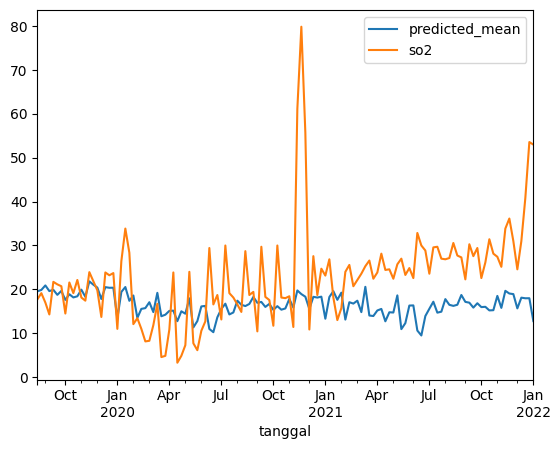

In [ ]:
import matplotlib.pyplot as plt


#plot prediksi vs actual
predicted_val1['predicted_mean'].plot(legend=True)
test['so2'].plot(legend=True)

#Evaluasi Seasonal Arima

In [ ]:
# Load tools evaluasi
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tools.eval_measures import rmse

In [ ]:
mean_absolute_percentage_error(test['so2'], predicted_val1['predicted_mean'])

0.4067325609211184

In [ ]:
# Menggunakan fungsi rmse
rmse_value = rmse(test['so2'], predicted_val1['predicted_mean'])

# Menampilkan hasil RMSE
print("RMSE:", rmse_value)

RMSE: 12.411416906411473


#SVR

In [ ]:
from sklearn.svm import SVR

In [ ]:
!pip install yfinance

In [ ]:
# Proses data menjadi format yang sesuai
ordered_data_timeseries['tanggal'] = ordered_data_timeseries.index
ordered_data_timeseries = ordered_data_timeseries.reset_index(drop=True)
ordered_data_timeseries = ordered_data_timeseries[['tanggal', 'so2']]
ordered_data_timeseries.columns = ['ds', 'y']

NameError: ignored

In [ ]:
# Split data menjadi train dan test set
train_size = int(len(ordered_data_timeseries) * 0.8)
train, test = ordered_data_timeseries[:train_size], ordered_data_timeseries[train_size:]

# SVR Model
svr = SVR(kernel='rbf', C=1000, gamma=0.1)
svr.fit(train[['ds']].values.reshape(-1, 1), train['y'])

# Prediksi dengan SVR
predictions_svr = svr.predict(test[['ds']])

# Plot hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(test['ds'], test['y'], label='Actual')
plt.plot(test['ds'], predictions_svr, label='SVR Predictions')
plt.legend()
plt.show()

#Evaluasi SVR

In [ ]:
# Hitung prediksi SVR
predictions_svr = svr.predict(test[['ds']])

# Hitung RMSE SVR
rmse_svr = np.sqrt(mean_squared_error(test['y'], predictions_svr))
print("RMSE SVR:", rmse_svr)

#LSTM

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from math import sqrt

In [ ]:
# Menampilkan daftar kolom yang ada dalam DataFrame
print(ordered_data_timeseries.columns)

# Memastikan kolom 'tanggal' dan 'pm10' ada dalam DataFrame
if 'tanggal' in ordered_data_timeseries.columns and 'so2' in ordered_data_timeseries.columns:
    # Pilih kolom yang berisi data waktu dan kualitas udara
    df_pm = ordered_data_timeseries[['tanggal', 'so2']]

    # Konversi kolom tanggal ke format datetime
    df_pm['tanggal'] = pd.to_datetime(df_pm['tanggal'])

    # Lanjutkan dengan langkah-langkah lainnya
    # ...
else:
    print("Kolom 'tanggal' dan/atau 'so2' tidak ada dalam DataFrame.")


In [ ]:
# Pilih kolom yang berisi data waktu dan kualitas udara
df_pm = ordered_data_timeseries[['ds', 'y']]

# Konversi kolom tanggal ke format datetime
df_pm['ds'] = pd.to_datetime(ordered_data_timeseries['ds'])

# Set tanggal sebagai index
df_pm.set_index('ds', inplace=True)

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_pm['y'].values.reshape(-1, 1))

# Fungsi untuk membuat dataset sesuai format LSTM
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Menentukan time step
time_step = 10
X, y = create_dataset(scaled_data, time_step)

# Reshape data menjadi bentuk yang sesuai untuk LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Membuat model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model
model.fit(X, y, epochs=100, batch_size=64, verbose=1)

# Membuat dataset untuk 3 tahun ke depan
future_steps = 36
future_data = scaled_data[-time_step:].reshape(1, -1, 1)

# Melakukan prediksi untuk 3 tahun ke depan
future_predictions = []
for i in range(future_steps):
    prediction = model.predict(future_data)
    future_predictions.append(prediction[0, 0])
    future_data = np.append(future_data[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

# Mengembalikan data ke skala asli
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Menampilkan hasil prediksi
print(future_predictions)

# Visualisasi hasil
# Ambil data asli dan hasil prediksi ke dalam DataFrame
actual_data = df_pm['y'].values[-future_steps:]
result_df = pd.DataFrame({'Actual': actual_data, 'Predicted': future_predictions.flatten()}, index=df.index[-future_steps:])

# Plot data asli dan hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(result_df.index, result_df['Actual'], label='Actual Data', marker='o')
plt.plot(result_df.index, result_df['Predicted'], label='Predicted Data', marker='o')
plt.title('Actual vs Predicted Air Quality')
plt.xlabel('Time')
plt.ylabel('Air Quality')
plt.legend()
plt.show()

#Evaluasi LSTM

In [ ]:
# Ambil data asli untuk periode waktu yang sesuai dengan prediksi
actual_data = df_pm['y'].values[-future_steps:]

# Hitung MSE (Mean Squared Error)
mse = mean_squared_error(actual_data, future_predictions)

# Hitung RMSE (Root Mean Squared Error)
rmse = sqrt(mse)

print(f"RMSE: {rmse}")

## Neural network


In [ ]:
import tensorflow as tf
import numpy as np
#import matplotlib.pyplot as plt



def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)


def solution_C5():

    series = data_timeseries['so2']

    # Normalization Function. DO NOT CHANGE THIS CODE
    min=np.min(series)
    max=np.max(series)
    series -= min
    series /= max
    # time=np.array(time_step)
    time = data_timeseries['tanggal']

    # DO NOT CHANGE THIS CODE
    split_time=2500

    time_train = time[:split_time]  # YOUR CODE HERE
    x_train = series[:split_time]  # YOUR CODE HERE
    time_valid = time[split_time:]  # YOUR CODE HERE
    x_valid = series[split_time:]  # YOUR CODE HERE

    # DO NOT CHANGE THIS CODE
    window_size=64
    batch_size=256
    shuffle_buffer_size=1000

    train_set=windowed_dataset(
        x_train, window_size, batch_size, shuffle_buffer_size)
    print(train_set)
    print(x_train.shape)

    model=tf.keras.models.Sequential([
        # YOUR CODE HERE.
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(48, activation="relu"),
        tf.keras.layers.Dense(5),
    ])

    # YOUR CODE HERE
    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('mae') < 0.1:
                self.model.stop_training = True
    callbacks = myCallback()

    # YOUR CODE HERE
    model.compile(loss='mse', optimizer='adam',metrics=["mae"])
    model.fit(train_set,epochs=1000, callbacks=[callbacks])
    return model


# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model=solution_C5()
    model.save("model_C5.h5")


In [ ]:
import numpy as np
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model("model_C5.h5")

# Assuming you have a new series for prediction, similar to the training data
# Replace the following line with your actual new data
new_series = np.random.rand(100)  # Example: Generating random data for illustration

# Normalize the new data using the same min and max values as in training
min_train = np.min(x_train)
max_train = np.max(x_train)
new_series_normalized = (new_series - min_train) / max_train

# Create windows for the new data
window_size = 64  # Same window size as used in training
windows = tf.data.Dataset.from_tensor_slices(new_series_normalized)
windows = windows.window(window_size, shift=1, drop_remainder=True)
windows = windows.flat_map(lambda w: w.batch(window_size))

# Reshape the windows to match the model's input shape
input_data = windows.batch(1).prefetch(1)

# Make predictions
predictions = model.predict(input_data)

# Denormalize the predictions to get the actual values
predictions_denormalized = predictions * max_train + min_train

# Print or use the predictions as needed
print(predictions_denormalized)
